Regression in Scikit Learn



In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# Import dataset
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df_linear = df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [4]:
df_linear.age.fillna(value=df_linear['age'].mean(), inplace= True)

C:\Users\abuba\AppData\Local\Temp\ipykernel_5852\3863056841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(), inplace= True)


In [5]:
df_linear.isnull().sum()/len(df)*100


age     0.0
fare    0.0
dtype: float64

In [6]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

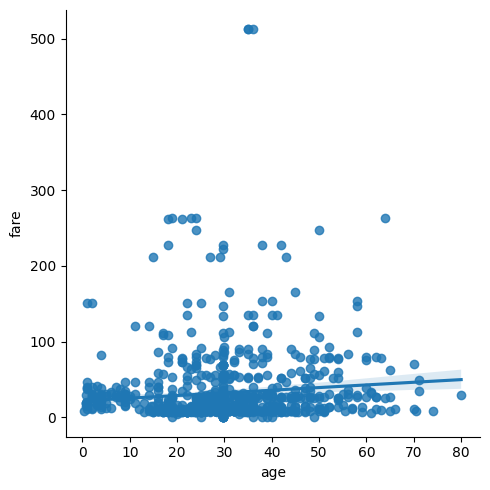

In [7]:
#plot
sns.lmplot(data=df_linear, x='age',y='fare')

<Axes: ylabel='age'>

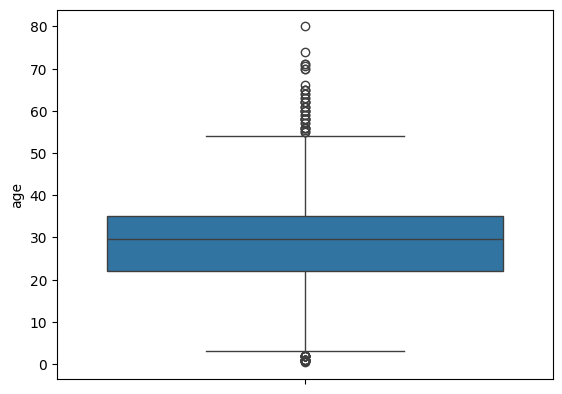

In [8]:
sns.boxplot(data=df_linear, y='age')

In [9]:
df_linear=df_linear[(df_linear['age']>8) & (df_linear['age']<50)]

<Axes: ylabel='age'>

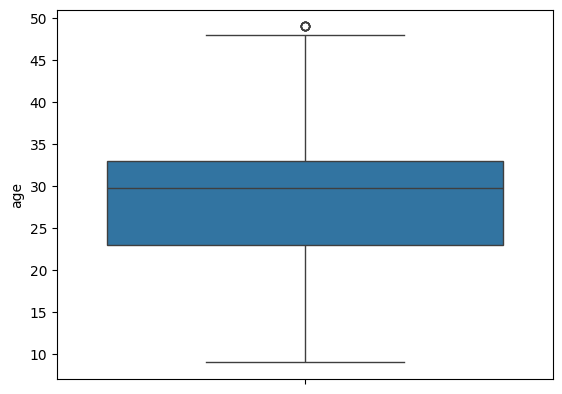

In [10]:
sns.boxplot(data=df_linear, y='age')

<Axes: ylabel='fare'>

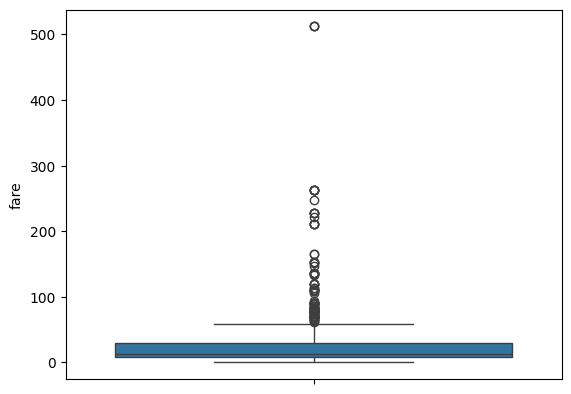

In [11]:
sns.boxplot(data=df_linear, y='fare')

In [12]:
df_linear=df_linear[(df_linear['fare']>1) & (df_linear['fare']<40)]

In [13]:
x=df_linear[['age']]
y=df_linear['fare']

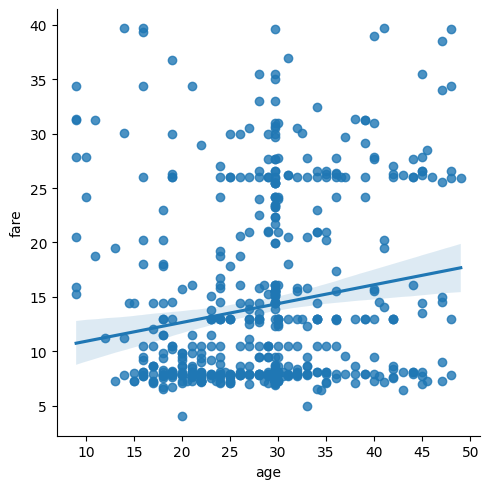

In [14]:
sns.lmplot(data=df_linear, x='age',y='fare')

In [15]:
#Call Model
model= LinearRegression()

#Fit Model
model.fit(x,y)

#prediction
model.predict([[1]])

c:\Users\abuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.34847848])

In [16]:
#model evaluation with metrics
# r2
# Mean squared error
# MAE
# RMSE

x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8)

#model

model=LinearRegression()
model.fit(x_train,y_train)

#prediction

predictions=model.predict(x_test)


<Axes: xlabel='fare'>

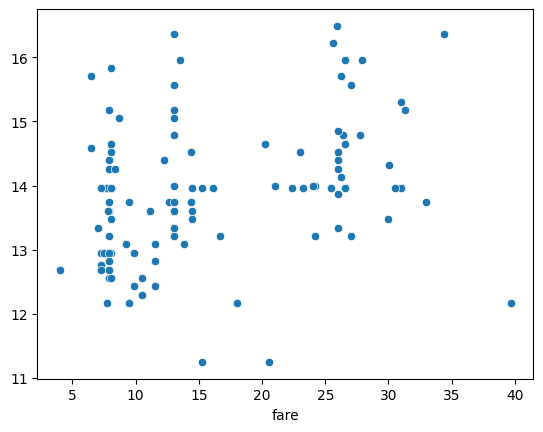

In [17]:
sns.scatterplot(x=y_test,y=predictions)

In [18]:
model.score(x_test, y_test)

0.02546124749056533

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
MAE=mean_absolute_error(y_true=y_test,y_pred=predictions)
MSE=mean_squared_error(y_true=y_test,y_pred=predictions)
RMSE=mean_squared_error(y_true=y_test,y_pred=predictions, squared=False)
R2=r2_score(y_true=y_test,y_pred=predictions)

print('MAE: ',MAE)
print('MSE: ',MSE)
print('RMSE: ',RMSE)
print('R2: ',R2)



MAE:  6.7725932508893445
MSE:  69.45825296610208
RMSE:  8.334161803451027
R2:  0.02546124749056533
